In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import urllib.request
from pathlib import Path 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## 1. Load the Data

In [50]:
data = pd.read_csv("dataset.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [51]:
#Show the name of the columns, Dtype and Non-null Count
data.info()
print(f'\nColumn names:\n{data.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [52]:
# Understanding the dataset's structure and dimensions
print(f'Dataset shape:\n{data.shape}')
print(f'\nColumn names:\n{data.columns}')
print()

#Shows the statistics of all numerical attributes in the dataset
data.describe()

Dataset shape:
(480, 17)

Column names:
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')



,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [53]:
print(f'Number of Null value in each column in dataset: \n\n{data.isnull().sum()}')

Number of Null value in each column in dataset: 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


## 2. Data Visualization 

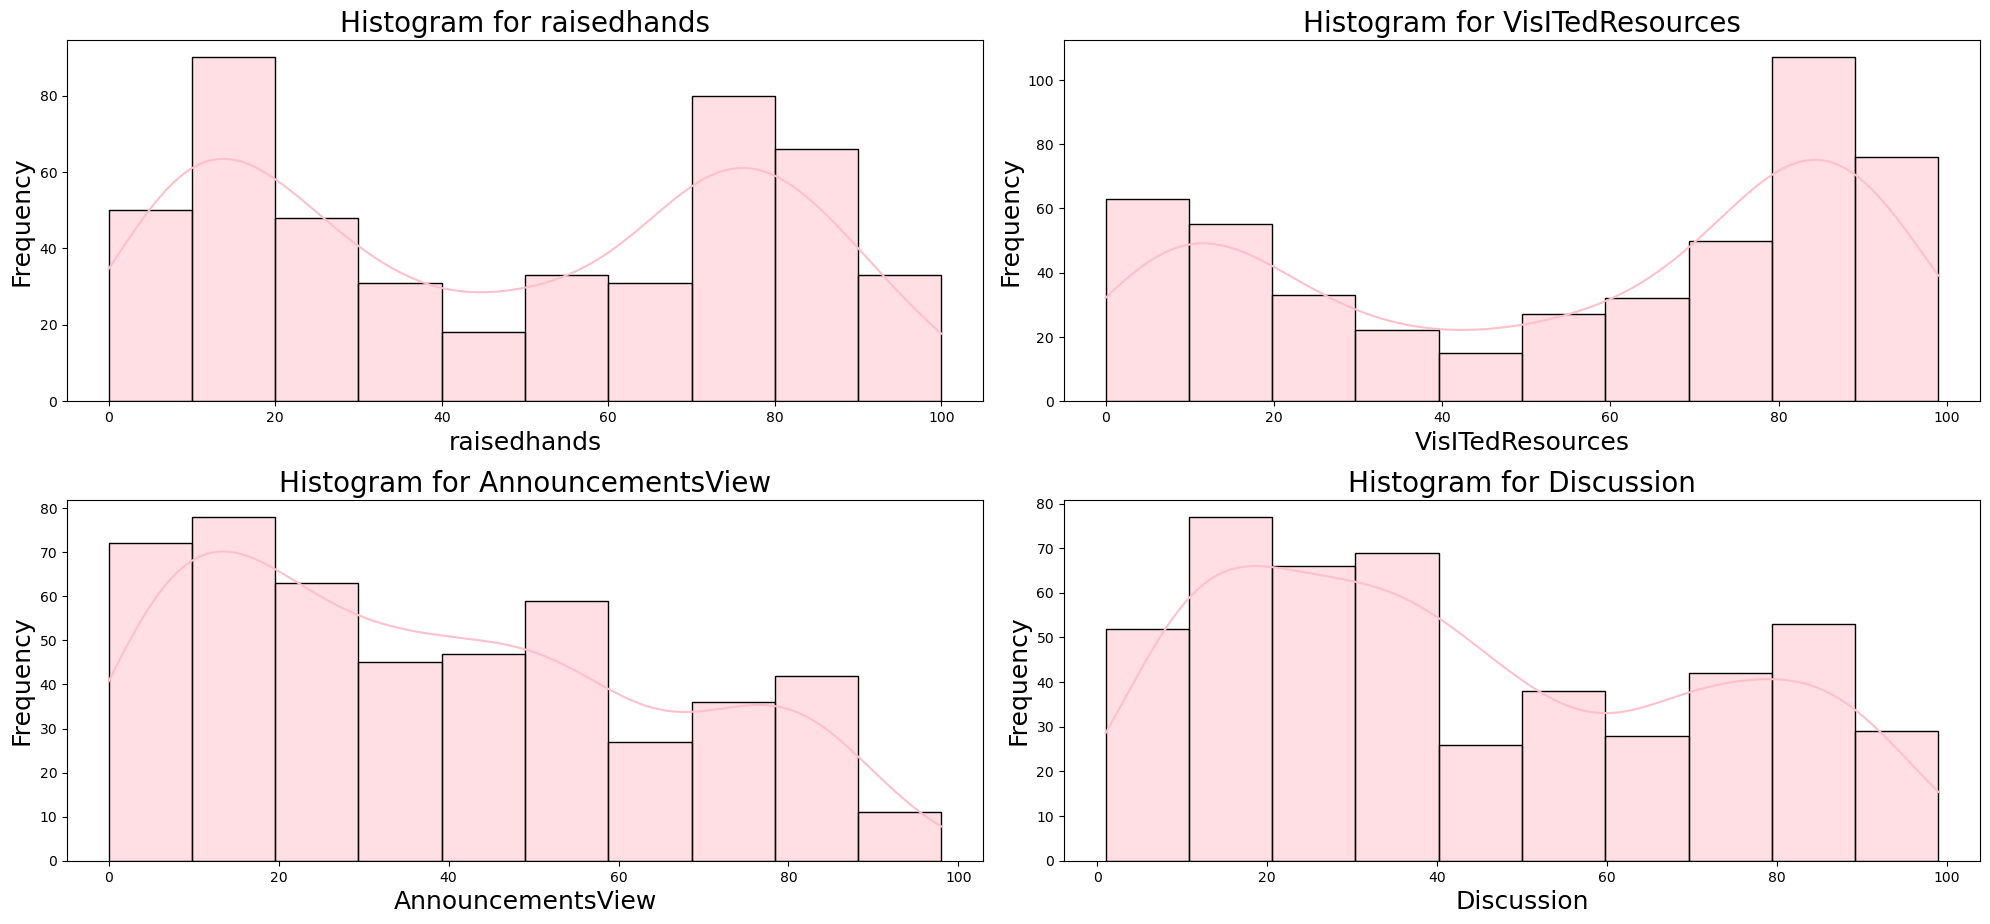

In [54]:
# List of numeric columns
numeric_columns =['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through the numeric columns and create a subplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)  # Adjust number of rows/columns depending on the number of plots
    sns.histplot(data[column], kde=True, color='pink')
    plt.title(f'Histogram for {column}', size=20)
    plt.xlabel(column, size=18)
    plt.ylabel('Frequency', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [55]:
# List of categorial columns
categorial_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

#examine the distribution of categories using value counts for categorial data
for column in categorial_col:
    counts = data[column].value_counts()
    print(counts)
    print('------------------------------')

gender
M    305
F    175
Name: count, dtype: int64
------------------------------
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64
------------------------------
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05  

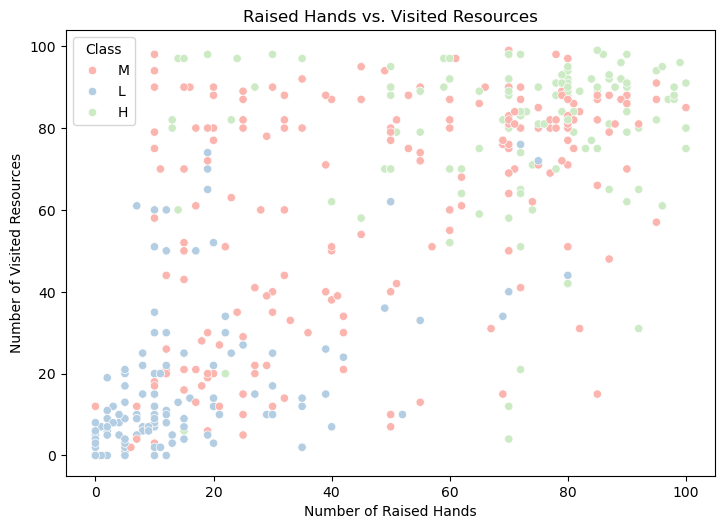

In [56]:
# Set up the visualizations
plt.figure(figsize=(14, 10))

# Scatter Plot: Raised hands vs. Visited Resources
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='raisedhands', y='VisITedResources', hue='Class', palette = 'Pastel1')
plt.title('Raised Hands vs. Visited Resources')
plt.xlabel('Number of Raised Hands')
plt.ylabel('Number of Visited Resources')
plt.tight_layout()
plt.show()

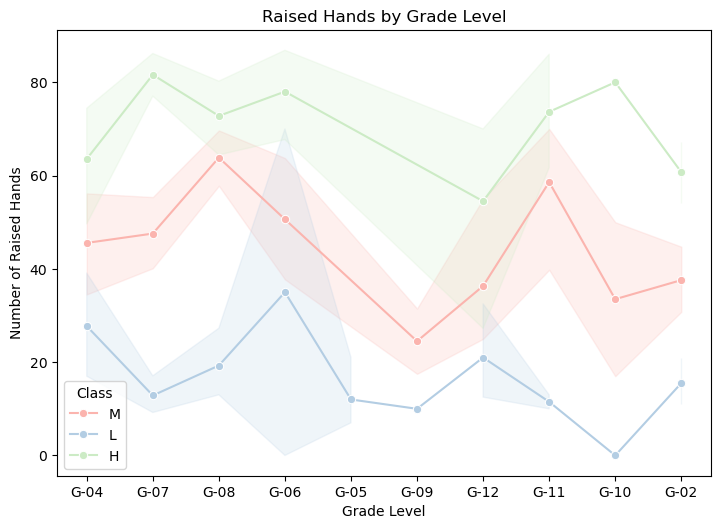

In [57]:
# Line Chart: Raised Hands over Students
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.lineplot(data=data, x='GradeID', y='raisedhands', hue='Class', marker='o', palette ='Pastel1')
plt.title('Raised Hands by Grade Level')
plt.xlabel('Grade Level')
plt.ylabel('Number of Raised Hands')
plt.tight_layout()
plt.show()

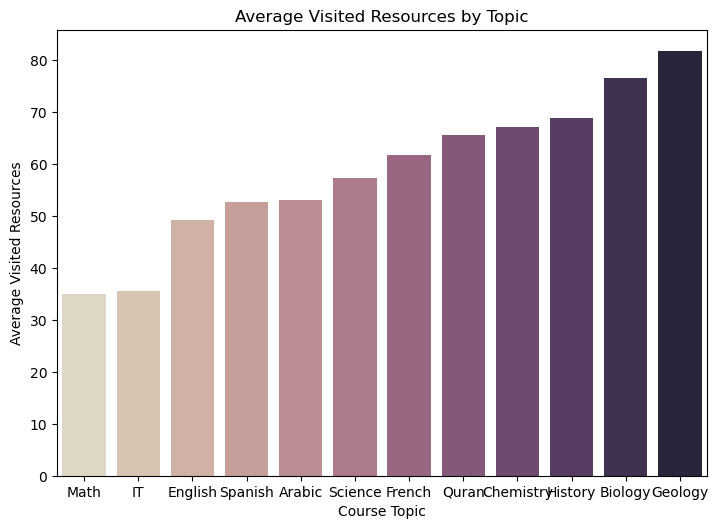

In [58]:
plt.figure(figsize=(14, 10))
# Bar Plot: Average Visited Resources by Topic
plt.subplot(2, 2, 3)
avg_visited_resources = data.groupby('Topic')['VisITedResources'].mean().sort_values()

sns.barplot(x=avg_visited_resources.index, y=avg_visited_resources.values, palette='ch:s=-.2,r=.6', hue=avg_visited_resources.index, legend=False)

plt.title('Average Visited Resources by Topic')
plt.xlabel('Course Topic')
plt.ylabel('Average Visited Resources')

plt.tight_layout()
plt.show()

Class
M    211
H    142
L    127
Name: count, dtype: int64

Number of students with Middle-Level grade (70-89) are 211, 
Number of students with High-Level grade (90-100 are) 142 and 
Number of students with Low-Level grade (0-69) are 127


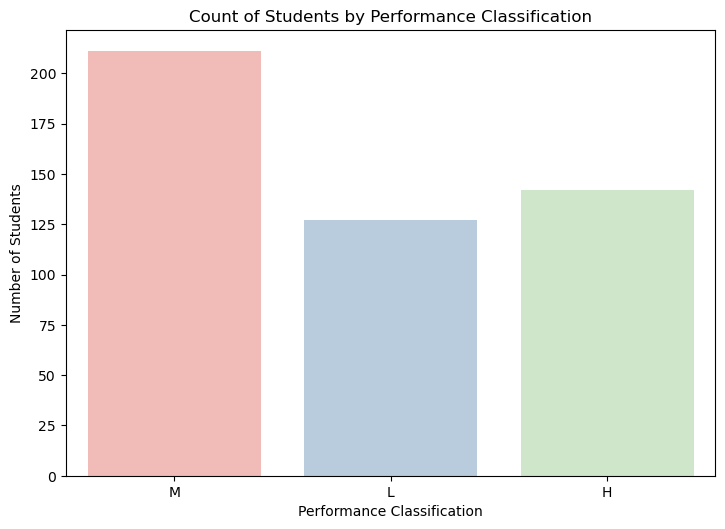

In [59]:
x=(data['Class'].value_counts())
print(x)

print(f'\nNumber of students with Middle-Level grade (70-89) are {x.iloc[0]}, \nNumber of students with High-Level grade (90-100 are) {x.iloc[1]} and \nNumber of students with Low-Level grade (0-69) are {x.iloc[2]}')
plt.figure(figsize=(14, 10))
# Bar Plot: Average Visited Resources by Topic
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Class', palette='Pastel1', hue='Class', legend=False)
plt.title('Count of Students by Performance Classification')
plt.xlabel('Performance Classification')
plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()

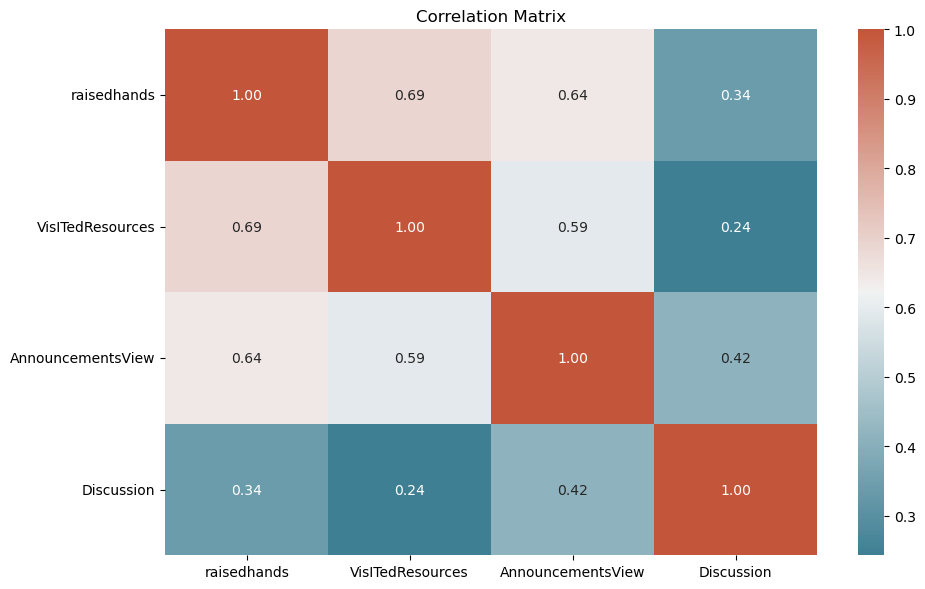

In [60]:
# Calculate and visualize correlation matrix
correlation_matrix = data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].corr()

# Create a diverging palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with the diverging palette
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<li>correlation coefficient, which can vary from -1 to 1, indicates the strength and direction of the relationship between two variables.</li><li>Coefficient close to 1 suggests a strong positive correlation. Conversely, a coefficient close to -1 indicates a strong negative correlation.</li><li>Coefficients near 0 indicate no linear correlation between the variables.</li>


In [61]:
cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

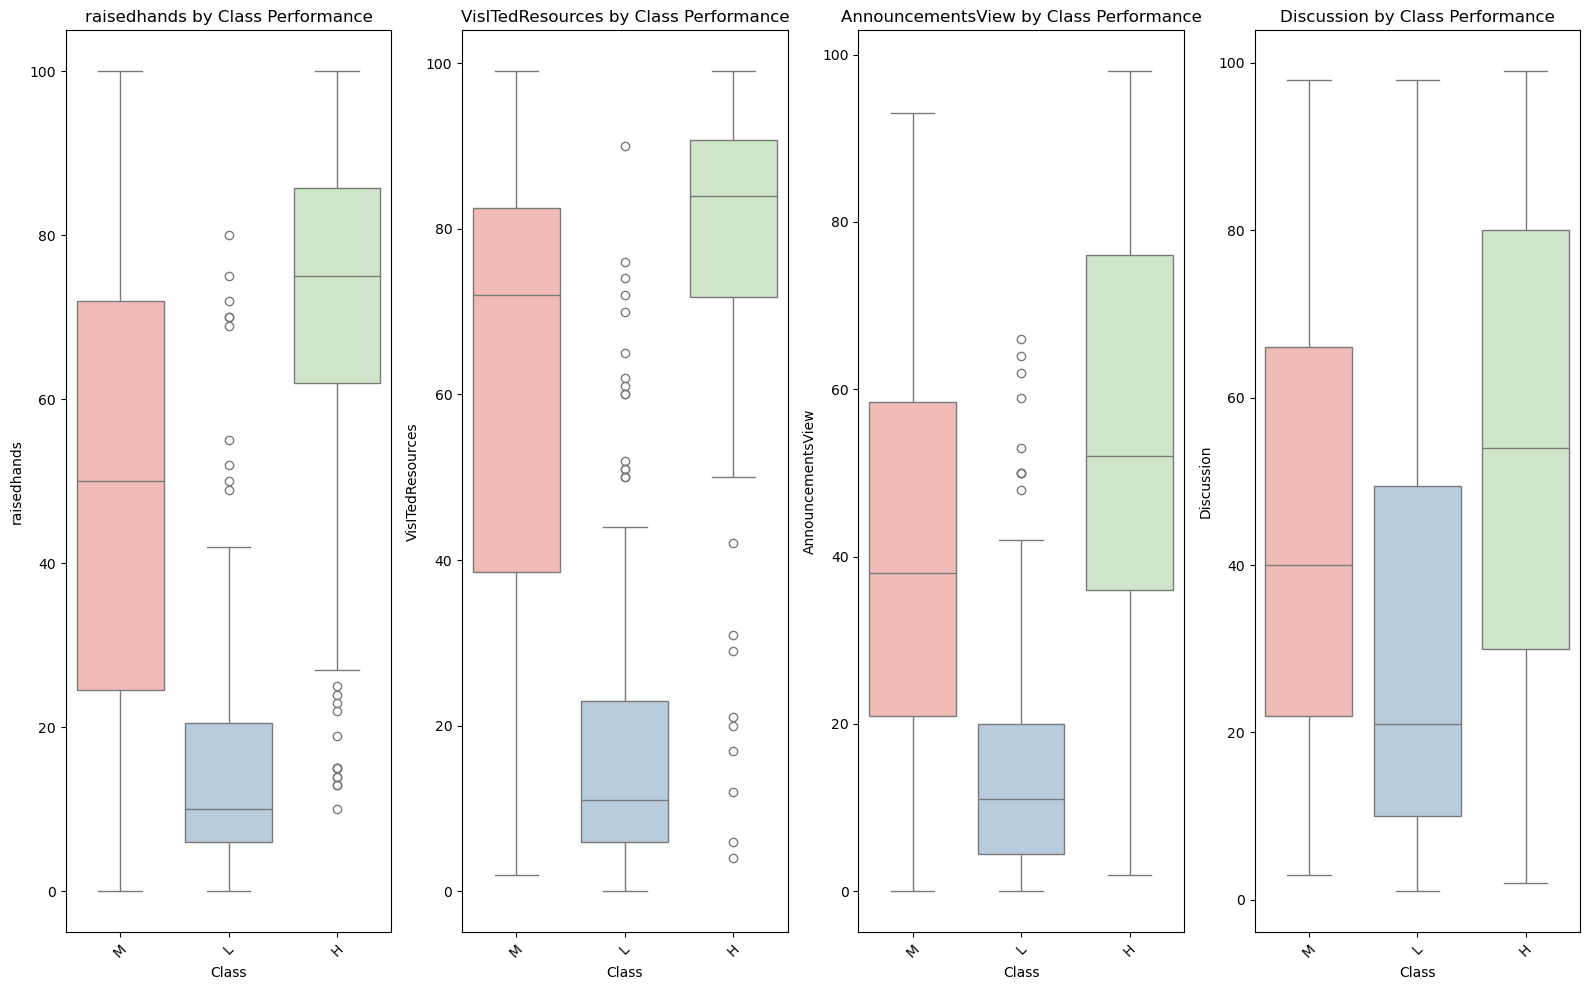

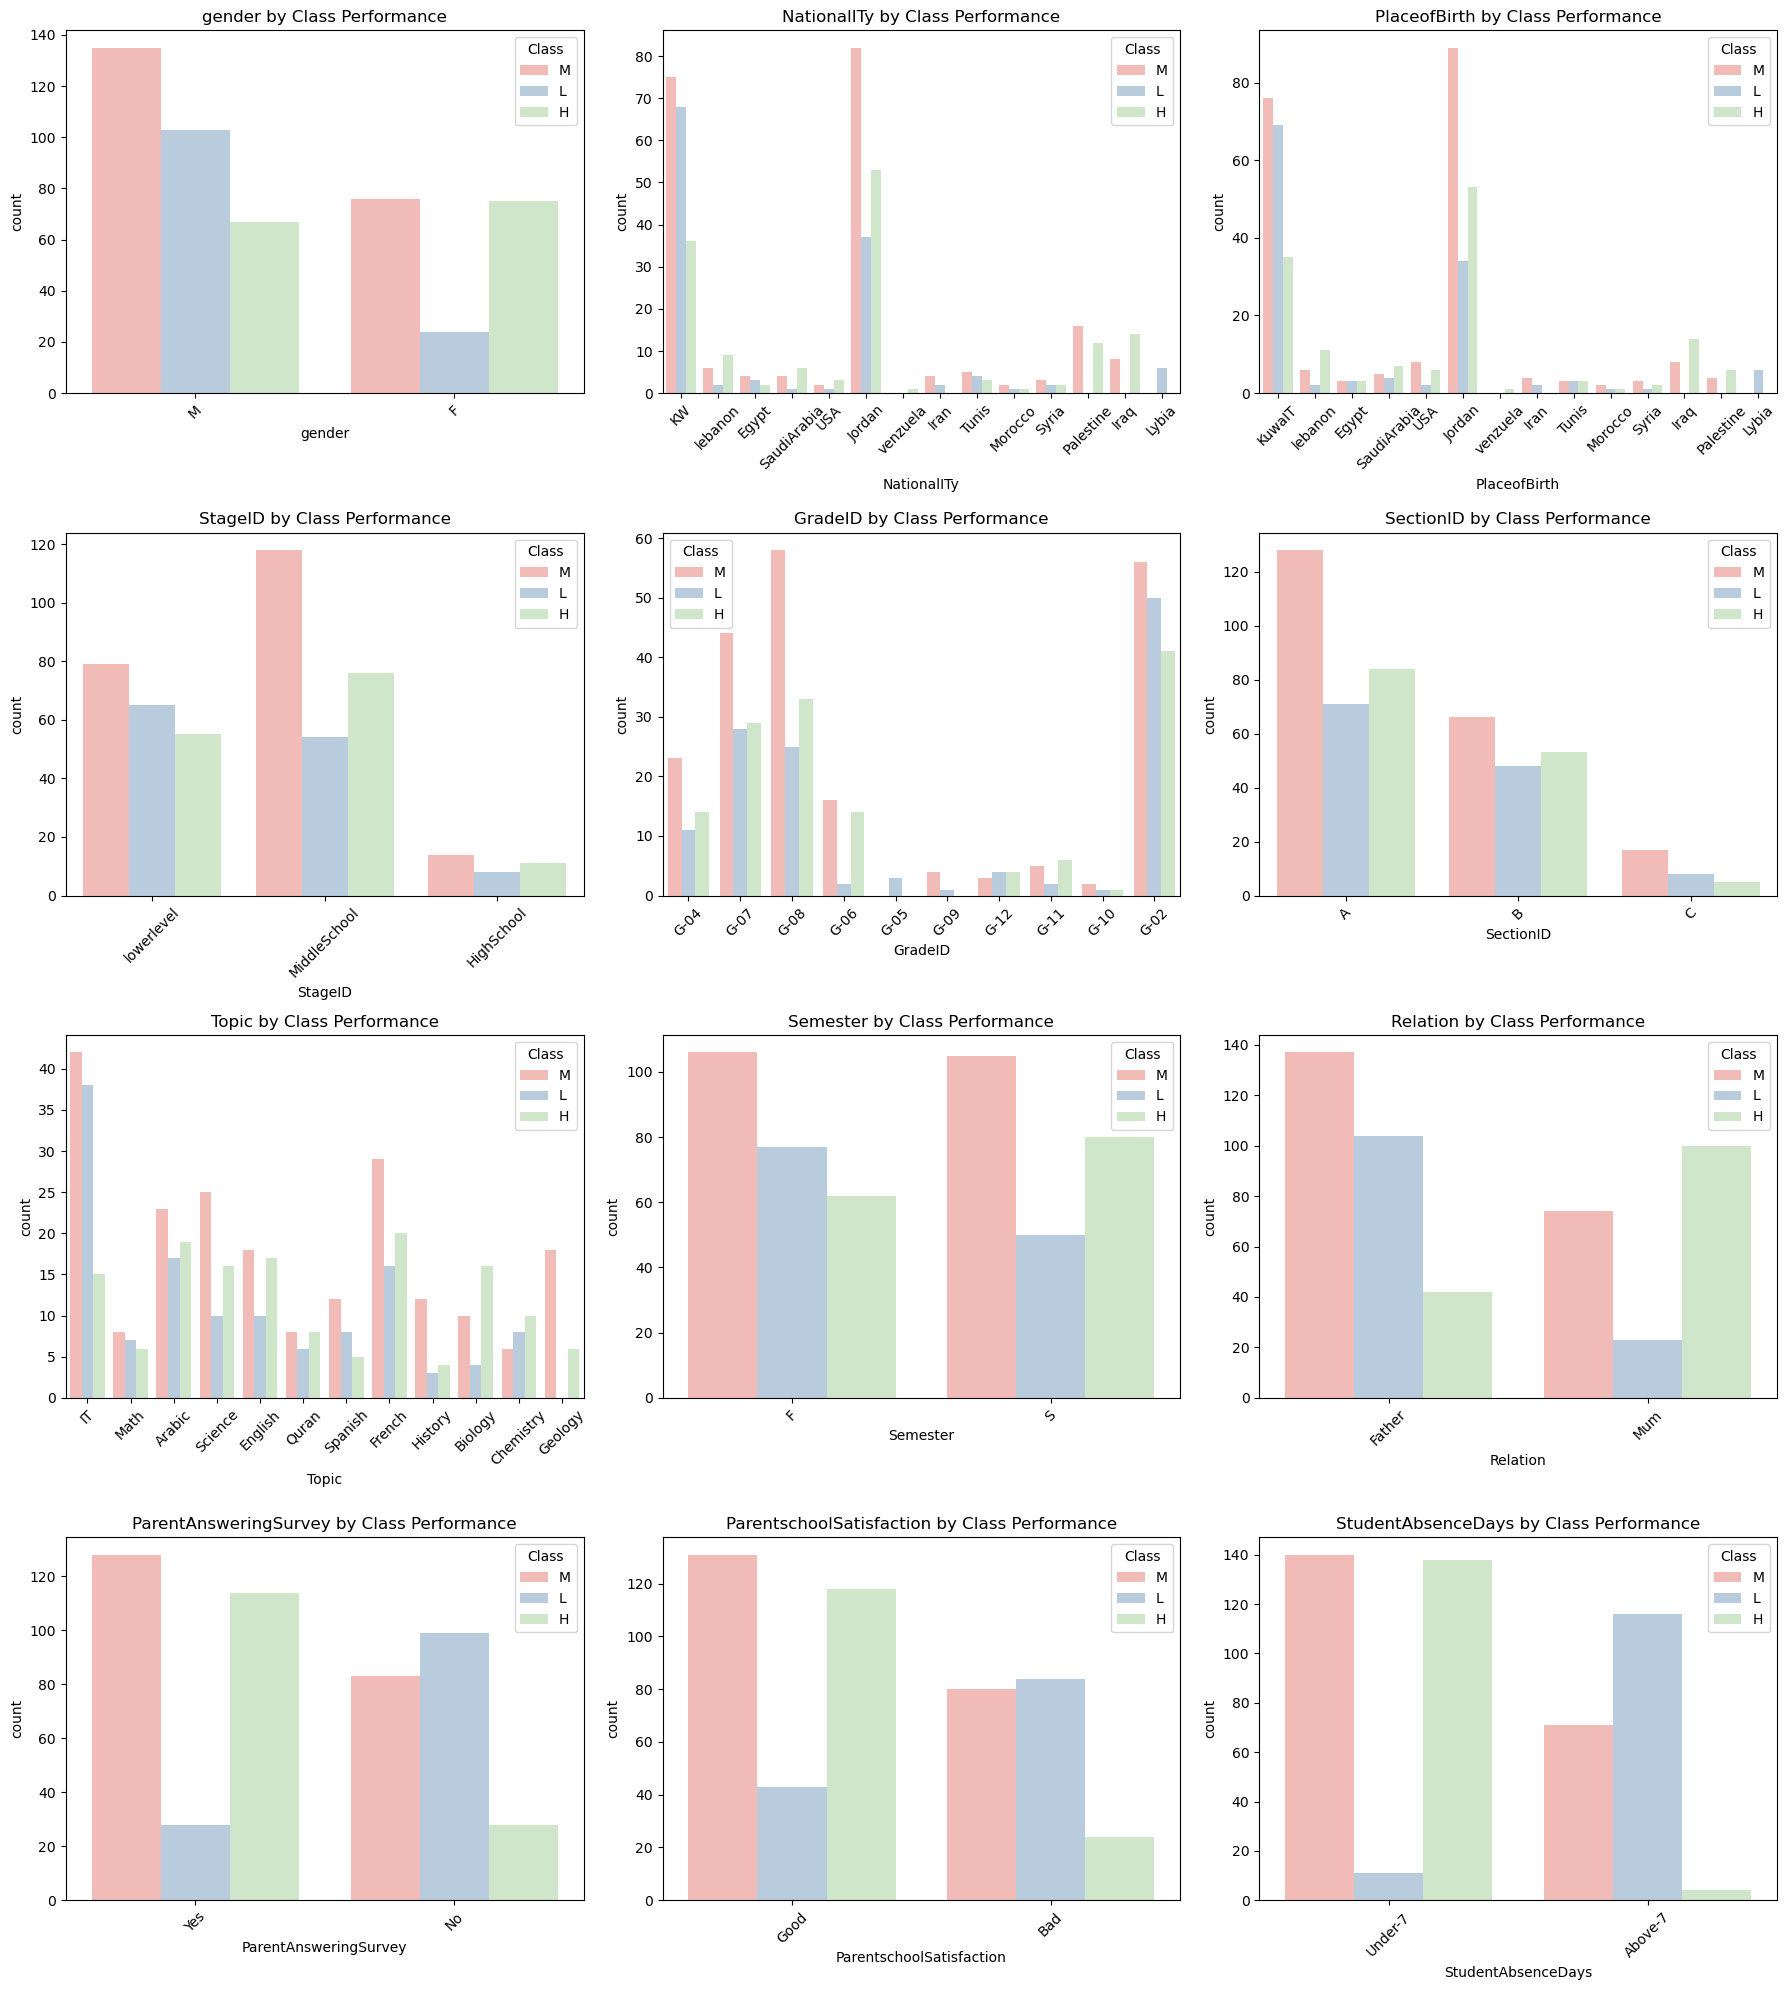

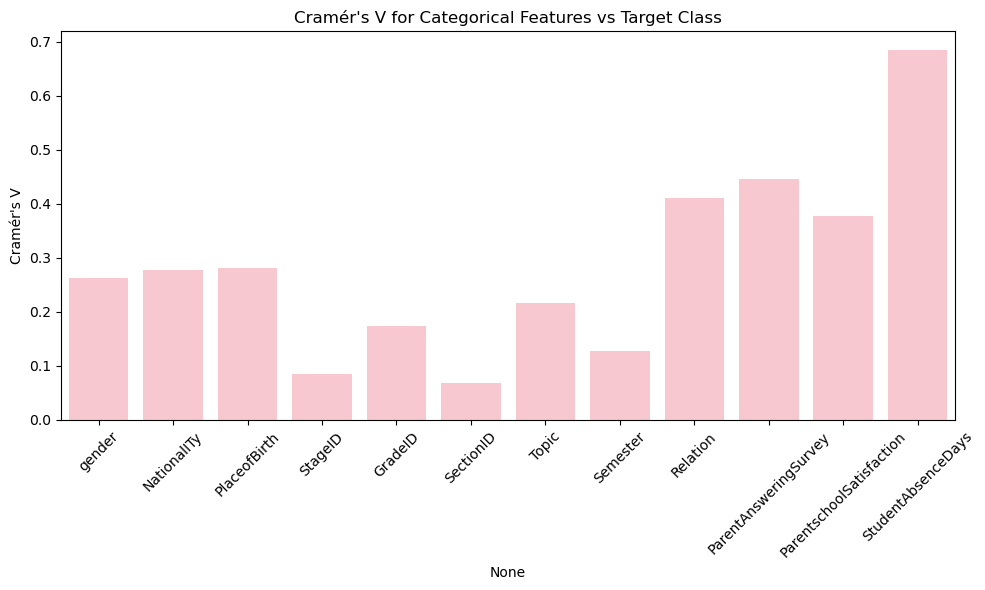

In [62]:
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the numerical and categorical features
cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Initialize a figure for numerical features
fig, axes = plt.subplots(1, 4, figsize=(16, 10))  # 1 rows, 4 columns
axes = axes.flatten()

# Plot boxplots for numerical attributes against the target
for i, cont_col in enumerate(num_att):
    sns.boxplot(x='Class', y=cont_col, data=data, ax=axes[i], palette="Pastel1", hue='Class', legend=False)
    axes[i].set_title(f'{cont_col} by Class Performance')
    
    # Rotate the x-axis labels directly using tick_params
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Initialize a figure for categorical features
fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # Adjusted to 4 rows, 3 columns
axes = axes.flatten()

# Plot count plots for categorical attributes against the target
for i, cat_col in enumerate(cat_att):
    sns.countplot(x=cat_col, hue='Class', data=data, ax=axes[i], palette="Pastel1")
    axes[i].set_title(f'{cat_col} by Class Performance')
    
    # Explicitly set the tick positions and rotate the tick labels
    ticks = axes[i].get_xticks()  # Get current ticks
    axes[i].set_xticks(ticks)     # Set ticks first
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Cramér's V calculation function for categorical features correlation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Calculate Cramér's V for each categorical variable against the target
cramers_results = {}

for cat_col in cat_att:
    matrix = pd.crosstab(data[cat_col], data['Class'])
    cramers_results[cat_col] = cramers_v(matrix)

# Convert Cramér's V results to a DataFrame for better visualization
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=["Cramér's V"])

# Plot Cramér's V values as a barplot to see which categorical features have the strongest correlation with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_df.index, y="Cramér's V", data=cramers_df, color="pink")
plt.xticks(rotation=45)
plt.title("Cramér's V for Categorical Features vs Target Class")
plt.tight_layout()
plt.show()


## Feature Engineering

In [63]:
# Feature Interaction
data['raisedhands_VisitedResources'] = data['raisedhands'] * data['VisITedResources']
data['AnnouncementsView_Discussion'] = data['AnnouncementsView'] * data['Discussion']
data['Participation_Ratio'] = data['raisedhands'] / (data['VisITedResources'] + 1)

# Feature Creation
data['Total_Participation'] = data['raisedhands'] + data['VisITedResources'] + data['AnnouncementsView'] + data['Discussion']
data['HighAbsence'] = data['StudentAbsenceDays'].apply(lambda x: 1 if x == 'Above-7' else 0)
data['ParentSatisfaction_Survey'] = data['ParentschoolSatisfaction'] + '_' + data['ParentAnsweringSurvey']

# Binning
data['raisedhands_binned'] = pd.qcut(data['raisedhands'], q=3, labels=['low', 'medium', 'high'])
data['Total_Participation_binned'] = pd.cut(data['Total_Participation'], bins=3, labels=['low', 'medium', 'high'])
top_nationalities = data['NationalITy'].value_counts().nlargest(3).index
data['NationalITy_binned'] = data['NationalITy'].apply(lambda x: x if x in top_nationalities else 'Other')

In [64]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Class,raisedhands_VisitedResources,AnnouncementsView_Discussion,Participation_Ratio,Total_Participation,HighAbsence,ParentSatisfaction_Survey,raisedhands_binned,Total_Participation_binned,NationalITy_binned
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,...,L,0,30,0.000000,16,1,Bad_No,low,low,KW
228,M,KW,KuwaIT,HighSchool,G-11,B,Math,S,Mum,73,...,H,6132,6237,0.858824,315,1,Good_Yes,high,high,KW
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,...,M,7480,5530,0.955056,322,0,Good_Yes,high,high,Palestine
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,...,L,120,231,0.769231,62,1,Good_Yes,low,low,KW
360,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,F,Father,20,...,M,1760,868,0.224719,167,1,Good_Yes,low,medium,Jordan


In [65]:
train['Class'].value_counts()

Class
M    163
H    120
L    101
Name: count, dtype: int64

In [66]:
cat_col = ['NationalITy_binned','Total_Participation_binned','raisedhands_binned','ParentSatisfaction_Survey']

#examine the distribution of categories using value counts for categorial data
for column in cat_col:
    counts = data[column].value_counts()
    print(counts)
    print('------------------------------')

NationalITy_binned
KW           179
Jordan       172
Other        101
Palestine     28
Name: count, dtype: int64
------------------------------
Total_Participation_binned
medium    193
low       148
high      139
Name: count, dtype: int64
------------------------------
raisedhands_binned
medium    172
low       160
high      148
Name: count, dtype: int64
------------------------------
ParentSatisfaction_Survey
Good_Yes    227
Bad_No      145
Good_No      65
Bad_Yes      43
Name: count, dtype: int64
------------------------------


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 132 to 102
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   gender                        384 non-null    object  
 1   NationalITy                   384 non-null    object  
 2   PlaceofBirth                  384 non-null    object  
 3   StageID                       384 non-null    object  
 4   GradeID                       384 non-null    object  
 5   SectionID                     384 non-null    object  
 6   Topic                         384 non-null    object  
 7   Semester                      384 non-null    object  
 8   Relation                      384 non-null    object  
 9   raisedhands                   384 non-null    int64   
 10  VisITedResources              384 non-null    int64   
 11  AnnouncementsView             384 non-null    int64   
 12  Discussion                    384 non-null    int64  

In [68]:
Data = train.drop("Class", axis=1) #X
Data_ClassPerformance = train['Class'].copy() #y

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


catt_ordi_attribs = ['raisedhands_binned','Total_Participation_binned']
catt_attribs = ['gender','ParentSatisfaction_Survey','NationalITy_binned', 
                'PlaceofBirth', 'Relation', 'ParentAnsweringSurvey', 
                'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_attribs = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 
               'Discussion','HighAbsence','Total_Participation','Participation_Ratio',
               'AnnouncementsView_Discussion','raisedhands_VisitedResources']


num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, validate=True),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

cat_ordi_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
# Column transformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("catt", cat_pipeline, catt_attribs),
    ("catt_ordi",cat_ordi_pipeline ,catt_ordi_attribs)
])

Data_prepared = preprocessing.fit_transform(Data)

In [70]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['raisedhands', 'VisITedResources',
                                  'AnnouncementsView', 'Discussion',
                                  'HighAbsence', 'Total_Participation',
                                  'Participation_Ratio',
                                  'A...
                                  'NationalITy_binned', 'PlaceofBirth',
                                  'Relation', 'ParentAnsweringSurvey',
                                  'ParentschoolSatisfaction',
                                  'StudentAbsenceDays']),
                                ('catt_ordi',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['raisedhands_binned',
                                  'Total_Participation_binned'])])

In [71]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(Data_ClassPerformance)
Data_ClassPerformance = lencoder.transform(Data_ClassPerformance)
Data_ClassPerformance

array([1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2,

In [72]:
lencoder.classes_

array(['H', 'L', 'M'], dtype=object)

## Model Training

### Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = make_pipeline(preprocessing, PolynomialFeatures(degree=2), PCA(n_components=5), RandomForestClassifier(random_state=42))
forest_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('pca', PCA(n_components=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [74]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
forest_acc = cross_validate(forest_clf, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(forest_acc[f'test_{metric}'])
    std_metric = np.std(forest_acc[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------")


Accuracy Validation
Mean :			 0.7657894736842105
Standard Deviation :	 0.048309933249777934
------------------------------------------------------
Precision Validation
Mean :			 0.7765040415579234
Standard Deviation :	 0.051288658633319245
------------------------------------------------------
Recall Validation
Mean :			 0.7657894736842105
Standard Deviation :	 0.048309933249777934
------------------------------------------------------
F1 Validation
Mean :			 0.765661701049039
Standard Deviation :	 0.04868751607568157
------------------------------------------------------
Roc_auc Validation
Mean :			 0.9018807795742765
Standard Deviation :	 0.03205825513449489
------------------------------------------------------


### Decision Tree Classifier

In [75]:
tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
tree_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [76]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
tree_acc = cross_validate(tree_clf, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(tree_acc[f'test_{metric}'])
    std_metric = np.std(tree_acc[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------")

Accuracy Validation
Mean :			 0.6381241565452092
Standard Deviation :	 0.07626088177015916
------------------------------------------------------
Precision Validation
Mean :			 0.6416465225520953
Standard Deviation :	 0.072877994102634
------------------------------------------------------
Recall Validation
Mean :			 0.6381241565452092
Standard Deviation :	 0.07626088177015916
------------------------------------------------------
F1 Validation
Mean :			 0.6351410577365556
Standard Deviation :	 0.07601312781819623
------------------------------------------------------
Roc_auc Validation
Mean :			 0.7309666584111347
Standard Deviation :	 0.05998144399707847
------------------------------------------------------


### Support Vector Machine

In [77]:
svm_clf = make_pipeline(preprocessing, SVC(kernel='rbf', probability=True, random_state=42))
svm_clf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('svc', SVC(probability=True, random_state=42))])

In [78]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
svm_acc = cross_validate(svm_clf, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(svm_acc[f'test_{metric}'])
    std_metric = np.std(svm_acc[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------")

Accuracy Validation
Mean :			 0.7242914979757085
Standard Deviation :	 0.06566821587753001
------------------------------------------------------
Precision Validation
Mean :			 0.7306287039715424
Standard Deviation :	 0.06629160830554087
------------------------------------------------------
Recall Validation
Mean :			 0.7242914979757085
Standard Deviation :	 0.06566821587753001
------------------------------------------------------
F1 Validation
Mean :			 0.7234307228292296
Standard Deviation :	 0.0666759626566596
------------------------------------------------------
Roc_auc Validation
Mean :			 0.8911267486772626
Standard Deviation :	 0.03850190507854899
------------------------------------------------------


### Logistic Regression

In [79]:
log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [80]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
log_scores  = cross_validate(log_reg, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(log_scores[f'test_{metric}'])
    std_metric = np.std(log_scores[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------") 

Accuracy Validation
Mean :			 0.7112685560053982
Standard Deviation :	 0.04489228677829953
------------------------------------------------------
Precision Validation
Mean :			 0.7191196571459729
Standard Deviation :	 0.043384571564650774
------------------------------------------------------
Recall Validation
Mean :			 0.7112685560053982
Standard Deviation :	 0.04489228677829953
------------------------------------------------------
F1 Validation
Mean :			 0.7093123188452048
Standard Deviation :	 0.04520060095206923
------------------------------------------------------
Roc_auc Validation
Mean :			 0.884638294913727
Standard Deviation :	 0.02823749240381367
------------------------------------------------------


### Gradient Boosting Classifier

In [81]:
gb_clf = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42))
gb_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [82]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
gb_acc  = cross_validate(gb_clf, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(gb_acc[f'test_{metric}'])
    std_metric = np.std(gb_acc[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------") 

Accuracy Validation
Mean :			 0.6980431848852902
Standard Deviation :	 0.0693493432565862
------------------------------------------------------
Precision Validation
Mean :			 0.703356865508866
Standard Deviation :	 0.06946114211603856
------------------------------------------------------
Recall Validation
Mean :			 0.6980431848852902
Standard Deviation :	 0.0693493432565862
------------------------------------------------------
F1 Validation
Mean :			 0.6968582036272731
Standard Deviation :	 0.07117461171350076
------------------------------------------------------
Roc_auc Validation
Mean :			 0.8709751535230156
Standard Deviation :	 0.026342207538881092
------------------------------------------------------


### K nearest Neighbour Classifier

In [83]:
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Pa...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [84]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')
}

# Perform cross-validation
knn_  = cross_validate(knn_clf, 
                            Data, Data_ClassPerformance,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

# Print the mean and standard deviation of each metric
for metric in scoring.keys():
    mean_metric = np.mean(knn_[f'test_{metric}'])
    std_metric = np.std(knn_[f'test_{metric}'])
    print(f"{metric.capitalize()} Validation")
    print(f"Mean :\t\t\t {mean_metric}")
    print(f"Standard Deviation :\t {std_metric}\n------------------------------------------------------") 

Accuracy Validation
Mean :			 0.7115384615384616
Standard Deviation :	 0.06530323097262843
------------------------------------------------------
Precision Validation
Mean :			 0.7156895340641471
Standard Deviation :	 0.06844063242810827
------------------------------------------------------
Recall Validation
Mean :			 0.7115384615384616
Standard Deviation :	 0.06530323097262843
------------------------------------------------------
F1 Validation
Mean :			 0.7085035108897132
Standard Deviation :	 0.06727238931101609
------------------------------------------------------
Roc_auc Validation
Mean :			 0.8573059895625297
Standard Deviation :	 0.03595737402735314
------------------------------------------------------


## Fine Tuning short listed models

### Random Forest Classifier

In [98]:
from sklearn.pipeline import Pipeline
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("Random_forest", RandomForestClassifier(random_state=42)),
])
dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('Random_forest', RandomForestClassifier(random_state=42))])

In [99]:
# Define the parameter grid for RandomForestClassifier in the pipeline
param_grid = [
    {'Random_forest__n_estimators': [10, 50, 100],
     'Random_forest__max_depth': [1, 2, 3, 4, 6, 8],
     'Random_forest__criterion': ['gini', 'entropy']}
]
# Set up GridSearchCV with the corrected pipeline and parameter grid
grid_forest = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')
# Fit the GridSearchCV object
grid_forest.fit(Data, Data_ClassPerformance)
print("Best parameters for Random Forest:")
print(grid_forest.best_params_)
print("accuracy :",grid_forest.best_score_)

Best parameters for Random Forest:
{'Random_forest__criterion': 'entropy', 'Random_forest__max_depth': 6, 'Random_forest__n_estimators': 100}
accuracy : 0.7604166666666667


### Decision Tree Classifier

In [87]:
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("decision_tree", DecisionTreeClassifier(random_state=42)),
])

dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'decision_tree__max_depth': [1, 2, 3, 4, 6, 8],
    'decision_tree__criterion':['gini','entropy']
    }
]

grid_tree = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')

grid_tree.fit(Data, Data_ClassPerformance)
print("Best parameters for Decision Tree:")
print(grid_tree.best_params_)
print("accuracy :",grid_tree.best_score_)


Best parameters for Decision Tree:
{'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 3}
accuracy : 0.6979166666666667


### Support Vector Machine

In [89]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svm", SVC(kernel='rbf', probability=True, random_state=42))  # probability=True for roc_auc
])

svm_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('svm', SVC(probability=True, random_state=42))])

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'svm__C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000],
     'svm__gamma': ['scale', 0.01, 0.1],
     'svm__kernel': ['rbf', 'linear']}
]

grid_svm = GridSearchCV(svm_pipeline, param_grid, cv=2, scoring='accuracy')
grid_svm.fit(Data, Data_ClassPerformance)
print("Best parameters for SVM:")
print(grid_svm.best_params_)
print("accuracy :",grid_svm.best_score_)

Best parameters for SVM:
{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
accuracy : 0.7265625


### Logistic Regression

In [91]:
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression(random_state=42, max_iter=500)),
])

dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('logistic_regression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [92]:
import random
param_grid = {
    'logistic_regression__C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
}
grid_logreg = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')

grid_logreg.fit(Data, Data_ClassPerformance)
print("Best parameters for Logistic Regression:")
print(grid_logreg.best_params_)
print("accuracy :",grid_logreg.best_score_)

Best parameters for Logistic Regression:
{'logistic_regression__C': 0.1}
accuracy : 0.7447916666666667


### Gradient Boosting Classifier

In [114]:
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("gradient_boosting", GradientBoostingClassifier(random_state=42)),
])
dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('gradient_boosting',
                 GradientBoostingClassifier(random_state=42))])

In [115]:
param_grid = {
    'gradient_boosting__n_estimators': [50, 100, 200, 300],
    'gradient_boosting__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'gradient_boosting__max_depth': [3, 4, 5, 6, 7, 8]
}
# Correct GridSearchCV setup
grid_gboost = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')

# Fit the model with the data
grid_gboost.fit(Data, Data_ClassPerformance)
print("Best parameters for Gradient Boosting Machine:")
print(grid_gboost.best_params_)
print("accuracy :",grid_gboost.best_score_)

Best parameters for Gradient Boosting Machine:
{'gradient_boosting__learning_rate': 0.01, 'gradient_boosting__max_depth': 4, 'gradient_boosting__n_estimators': 200}
accuracy : 0.7109375


### K Nearest Neighbour 

In [95]:
dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("knn", KNeighborsClassifier()),
])

dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'PlaceofBirth', 'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('knn', KNeighborsClassifier())])

In [96]:
param_grid = {
    'knn__n_neighbors': [3,5,7,9],
}
grid_knn = GridSearchCV(dt_full_pipeline, param_grid, cv=2, scoring='accuracy')

grid_knn.fit(Data, Data_ClassPerformance)
grid_gboost.fit(Data, Data_ClassPerformance)
print("Best parameters for K Nearest Neighbour:")
print(grid_knn.best_params_)
print("accuracy :",grid_knn.best_score_)

Best parameters for K Nearest Neighbour:
{'knn__n_neighbors': 7}
accuracy : 0.6979166666666666


### Testing and Evaluation 

In [100]:
model_result = {}
model_result['Random Forest'] = grid_forest.best_score_
model_result['Decision Tree'] = grid_tree.best_score_
model_result['SVM'] = grid_svm.best_score_
model_result['Logistic Regression'] = grid_logreg.best_score_
model_result['Gradient Boosting'] = grid_gboost.best_score_
model_result['KNN'] = grid_knn.best_score_

result_df = pd.DataFrame([model_result])

result_df_transposed = result_df.transpose()

result_df_transposed.columns = ['Score']

result_df_transposed.sort_values(by='Score', ascending=False, inplace=True)

print(result_df_transposed)

                        Score
Random Forest        0.760417
Logistic Regression  0.744792
SVM                  0.726562
Gradient Boosting    0.710938
Decision Tree        0.697917
KNN                  0.697917


In [101]:
forest_final_model = grid_forest.best_estimator_
forest_final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('Random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        random_state=42))])

In [102]:
from sklearn.metrics import accuracy_score, classification_report

X_test = test.drop("Class", axis=1)
y_test = test["Class"].copy()
y_test = lencoder.transform(y_test)

final_predictions = forest_final_model.predict(X_test)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {final_accuracy}")

# Generate and print classification report
report = classification_report(y_test, final_predictions, target_names=lencoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           H       0.80      0.73      0.76        22
           L       0.83      0.96      0.89        26
           M       0.85      0.81      0.83        48

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.83      0.83        96



In [106]:
logreg_final_model = grid_logreg.best_estimator_

logreg_final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('logistic_regression',
                 LogisticRegression(C=0.1, max_iter=500, random_state=42))])

In [107]:
from sklearn.metrics import accuracy_score, classification_report

X_test = test.drop("Class", axis=1)
y_test = test["Class"].copy()
y_test = lencoder.transform(y_test)

final_predictions = logreg_final_model.predict(X_test)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {final_accuracy}")

# Generate and print classification report
report = classification_report(y_test, final_predictions, target_names=lencoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.8229166666666666
Classification Report:
              precision    recall  f1-score   support

           H       0.78      0.64      0.70        22
           L       0.86      0.96      0.91        26
           M       0.82      0.83      0.82        48

    accuracy                           0.82        96
   macro avg       0.82      0.81      0.81        96
weighted avg       0.82      0.82      0.82        96



In [108]:
svm_final_model = grid_svm.best_estimator_
svm_final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion', 'HighAbsence',
                                                   'Total_Partic...
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays']),
                                                 ('catt_ordi',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['raisedhands_binned',
                                                   'Total_Participation_binned'])])),
                ('svm',
                 SVC(C=10, gamma=0.1, probability=True, random_state=42))])

In [109]:
from sklearn.metrics import accuracy_score, classification_report

X_test = test.drop("Class", axis=1)
y_test = test["Class"].copy()
y_test = lencoder.transform(y_test)

final_predictions = svm_final_model.predict(X_test)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {final_accuracy}")

# Generate and print classification report
report = classification_report(y_test, final_predictions, target_names=lencoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.7395833333333334
Classification Report:
              precision    recall  f1-score   support

           H       0.58      0.64      0.61        22
           L       0.83      0.92      0.87        26
           M       0.77      0.69      0.73        48

    accuracy                           0.74        96
   macro avg       0.73      0.75      0.74        96
weighted avg       0.74      0.74      0.74        96



### Receiver Operating Characteristic - Area Under the Curve

### Random Forest Classifier

Shape of y_scores_rf_train: (384, 3)
Shape of y_scores_rf_test: (96, 3)


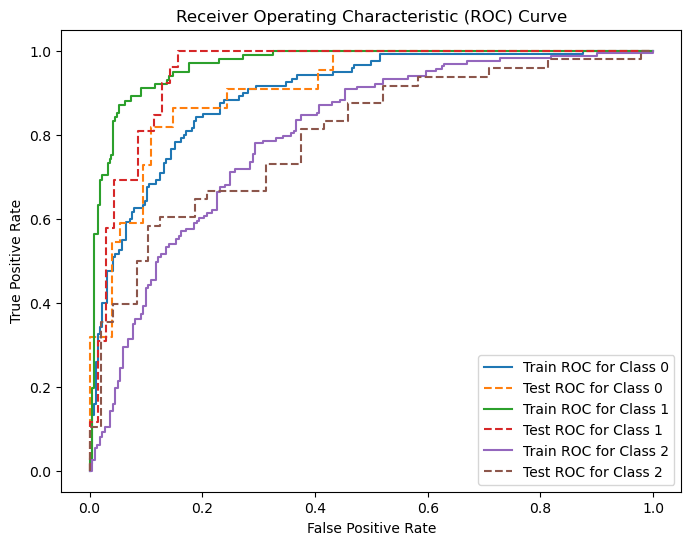

AUC for Class 0 on train set = 0.8955
AUC for Class 0 on test set = 0.9097
AUC for Class 1 on train set = 0.9673
AUC for Class 1 on test set = 0.9489
AUC for Class 2 on train set = 0.7987
AUC for Class 2 on test set = 0.7964


In [111]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Ensure risk_levels and risk are your target and features
classes = np.unique(Data_ClassPerformance)  # Ensure risk_levels is your target variable
y_train_bin = label_binarize(Data_ClassPerformance, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Fit the model using One-vs-Rest classifier
ovr_classifier = OneVsRestClassifier(forest_final_model)

# Compute probability estimates for train and test sets
y_scores_rf_train = cross_val_predict(ovr_classifier, Data, Data_ClassPerformance, cv=10, method='predict_proba')
y_scores_rf_test = cross_val_predict(ovr_classifier, X_test, y_test, cv=10, method='predict_proba')

# Check the shape of y_scores_svm_train and y_scores_svm_test
print(f"Shape of y_scores_rf_train: {np.shape(y_scores_rf_train)}")
print(f"Shape of y_scores_rf_test: {np.shape(y_scores_rf_test)}")

# For ROC and AUC: Compute the ROC for each class separately
plt.figure(figsize=(8, 6))

# Define the function to plot ROC curves
def plot_roc_curve(fpr, tpr, style='-', label=None):
    plt.plot(fpr, tpr, style, label=label)

# Loop through each class and plot ROC
for i, class_label in enumerate(classes):
    if y_scores_rf_train.ndim == 2:
        y_score_train = y_scores_rf_train[:, i]
        y_score_test = y_scores_rf_test[:, i]
    else:
        y_score_train = y_scores_rf_train
        y_score_test = y_scores_rf_test

    fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train_bin[:, i], y_score_train)
    fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test_bin[:, i], y_score_test)

    # Plot the ROC curve for this class (both train and test)
    plot_roc_curve(fpr_rf_train, tpr_rf_train, style='-', label=f'Train ROC for Class {class_label}')
    plot_roc_curve(fpr_rf_test, tpr_rf_test, style='--', label=f'Test ROC for Class {class_label}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC for each class
for i, class_label in enumerate(classes):
    if y_scores_rf_train.ndim == 2:
        y_score_train = y_scores_rf_train[:, i]
        y_score_test = y_scores_rf_test[:, i]
    else:
        y_score_train = y_scores_rf_train
        y_score_test = y_scores_rf_test

    auc_rf_train = roc_auc_score(y_train_bin[:, i], y_score_train)
    auc_rf_test = roc_auc_score(y_test_bin[:, i], y_score_test)
    print(f'AUC for Class {class_label} on train set = {auc_rf_train:.4f}')
    print(f'AUC for Class {class_label} on test set = {auc_rf_test:.4f}')


### Logistic Regression  

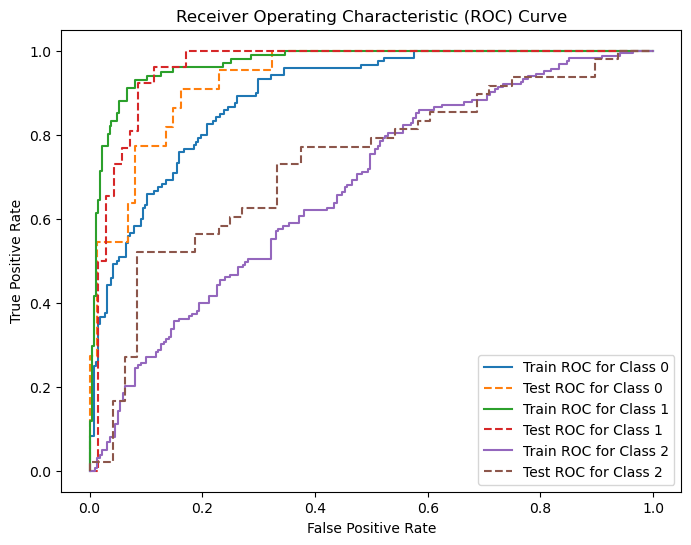

AUC for Class 0 on train set = 0.8926
AUC for Class 0 on test set = 0.9337
AUC for Class 1 on train set = 0.9705
AUC for Class 1 on test set = 0.9593
AUC for Class 2 on train set = 0.6726
AUC for Class 2 on test set = 0.7305


In [113]:
classes = np.unique(Data_ClassPerformance)  # Ensure risk_levels is your target variable
y_train_bin = label_binarize(Data_ClassPerformance, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Fit the model using One-vs-Rest classifier
ovr_classifier = OneVsRestClassifier(logreg_final_model)

# Compute decision scores for train and test sets
y_scores_logreg_train = cross_val_predict(ovr_classifier, Data, Data_ClassPerformance, cv=10, method='decision_function')
y_scores_logreg_test = cross_val_predict(ovr_classifier, X_test, y_test, cv=10, method='decision_function')
# For ROC and AUC: Compute the ROC for each class separately
plt.figure(figsize=(8, 6))

# Define the function to plot ROC curves
def plot_roc_curve(fpr, tpr, style='-', label=None):
    plt.plot(fpr, tpr, style, label=label)

# Loop through each class and plot ROC
for i, class_label in enumerate(classes):
    fpr_logreg_train, tpr_logreg_train, _ = roc_curve(y_train_bin[:, i], y_scores_logreg_train[:, i])
    fpr_logreg_test, tpr_logreg_test, _ = roc_curve(y_test_bin[:, i], y_scores_logreg_test[:, i])

    # Plot the ROC curve for this class (both train and test)
    plot_roc_curve(fpr_logreg_train, tpr_logreg_train, style='-', label=f'Train ROC for Class {class_label}')
    plot_roc_curve(fpr_logreg_test, tpr_logreg_test, style='--', label=f'Test ROC for Class {class_label}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC for each class
for i, class_label in enumerate(classes):
    auc_logreg_train = roc_auc_score(y_train_bin[:, i], y_scores_logreg_train[:, i])
    auc_logreg_test = roc_auc_score(y_test_bin[:, i], y_scores_logreg_test[:, i])
    print(f'AUC for Class {class_label} on train set = {auc_logreg_train:.4f}')
    print(f'AUC for Class {class_label} on test set = {auc_logreg_test:.4f}')
